In [1]:
from cv_hj_exact import *
from scipy.optimize import root

In [2]:
import os

save_flag = False  # True


def save_to(fig, filename):
    if save_flag:
        path = filename
        fig.savefig(path)
        print(f"save to {path}")

## burgers

### burgers-1

$x \in [0,2\pi]$, $u_0(x) = \sin(x)$

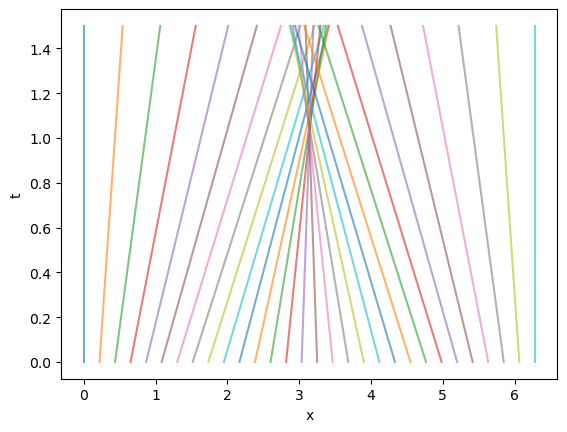

In [3]:
fig, axes = CV_show_line(
    u0=np.sin, df=lambda u: u, x=np.linspace(0, 2 * np.pi, 30), tend=1.5
)
save_to(fig, "burgers-1-line.png")

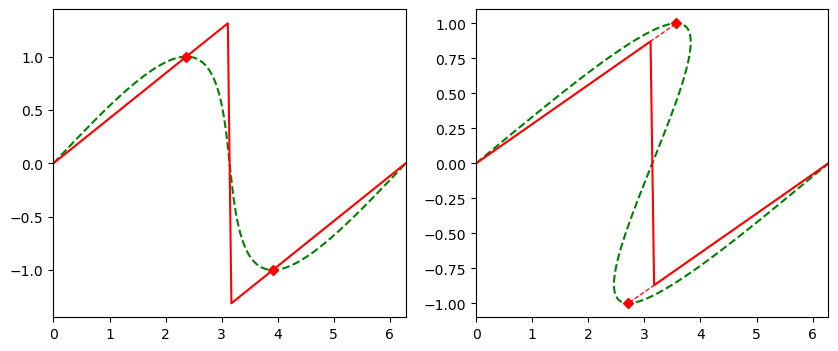

In [4]:
def start_point_triangle(x, t):
    return 1.0 / (np.pi / 2 + t) * np.where(x < np.pi, x, x - 2 * np.pi)

fig, axes = plt.subplots(1,2,figsize=(10, 4))
for i, tend in enumerate([0.8, 2.0]):
    xi_list = np.linspace(0, 2 * np.pi, 100)
    x_list = xi_list + np.sin(xi_list) * tend
    u_list = np.sin(xi_list)


    axes[i].plot(x_list, u_list, "g", linestyle="--")

    axes[i].plot([0, np.pi * 0.5 + tend], [0, 1], color="r", linestyle="--", lw=0.9)
    axes[i].plot([np.pi * 2, np.pi * 1.5 - tend], [0, -1], color="r", linestyle="--", lw=0.9)

    axes[i].plot(np.pi * 0.5 + tend, 1, "rD", markersize=5)
    axes[i].plot(np.pi * 1.5 - tend, -1, "rD", markersize=5)

    axes[i].plot(xi_list, start_point_triangle(xi_list, tend), color="r")

    axes[i].set_xlim(0, np.pi * 2)

save_to(fig, "burgers-1-init.png")

True
True
True
True


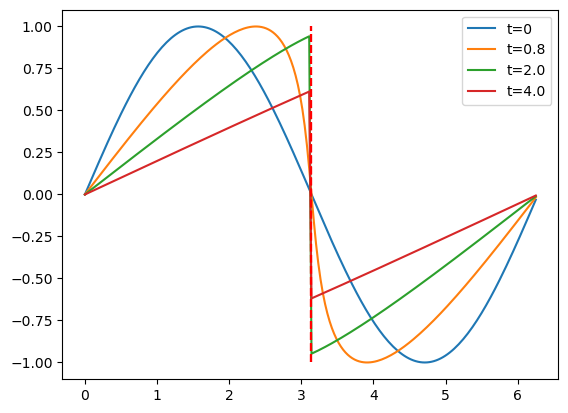

In [5]:
def init(x, t):
    k = 1 / (np.pi / 2 + t)
    u = np.where(x < np.pi, k * x, k * (x - 2 * np.pi))
    xi = x - u * t
    return xi


x = np.linspace(0, 2 * np.pi, 200, endpoint=False)

a = 0
b = 1
w = 1
phi = 0

fig, ax = plt.subplots()
for t in [0, 0.8, 2.0, 4.0]:
    x_tilde = np.mod(w * x + phi - a * w * t, 2 * np.pi)
    t_tilde = b * w * t

    f, df, post = CV_characteristic_equation(
        dF=lambda u: u,
        ddF=lambda u: np.ones_like(u),
        u0=np.sin,
        du0=np.cos,
        solve_xi=True,
    )

    tmp = root(
        lambda z: f(x_tilde, t_tilde)(z),
        jac=lambda z: np.diag(df(x_tilde, t_tilde)(z)),
        x0=init(x_tilde, t_tilde),
    )
    print(tmp.success)

    u_tilde = post(tmp.x)
    u = a + b * u_tilde

    ax.plot(x, u, label=f"t={t}")
    ax.legend()

    xstar = np.pi
    ax.plot(xstar * np.ones(10),np.linspace(-1,1,10),'r--')

save_to(fig, "burgers-1.png")

### burgers-2

$x \in [-\pi,\pi]$, $u_0(x) = 1 + 2\sin(x)$

True
True
True


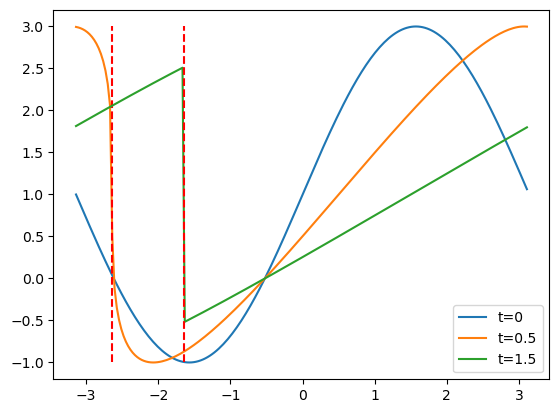

In [6]:
def init(x, t):
    k = 1 / (np.pi / 2 + t)
    u = np.where(x < np.pi, k * x, k * (x - 2 * np.pi))
    xi = x - u * t
    return xi


x = np.linspace(-np.pi, np.pi, 200, endpoint=False)

a = 1
b = 2
w = 1
phi = 0

fig, ax = plt.subplots()
for t in [0, 0.5, 1.5]:
    x_tilde = np.mod(w * x + phi - a * w * t, 2 * np.pi)
    t_tilde = b * w * t

    f, df, post = CV_characteristic_equation(
        dF=lambda u: u,
        ddF=lambda u: np.ones_like(u),
        u0=np.sin,
        du0=np.cos,
        solve_xi=True,
    )

    tmp = root(
        lambda z: f(x_tilde, t_tilde)(z),
        jac=lambda z: np.diag(df(x_tilde, t_tilde)(z)),
        x0=init(x_tilde, t_tilde),
    )
    print(tmp.success)

    u_tilde = post(tmp.x)
    u = a + b * u_tilde

    ax.plot(x, u, label=f"t={t}")
    ax.legend()

    if t >= 1.0 / np.abs(b * w):
        xstar = a * t + (np.pi - phi) / w - 2 * np.pi
        ax.plot(xstar * np.ones(10), np.linspace(-1, 3, 10), "r--")


save_to(fig, "burgers-2.png")

## HJ

### HJ-1

$H(p) = |p|$.

$x \in [0,2\pi]$, $\phi_0(x) = \sin(x)$

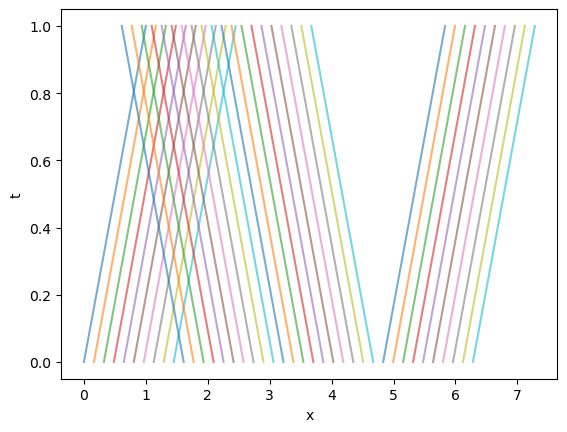

In [7]:
fig, axes = HJ_show_line(
    p0=lambda x: np.cos(x),
    dH=lambda p: np.sign(p),
    x=np.linspace(0, 2 * np.pi, 40),
    tend=1,
)
save_to(fig, "HJ-1-line.png")

True
False
False


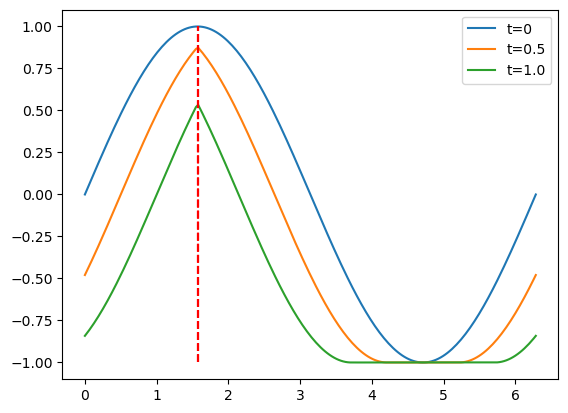

In [8]:
def init(x, t):
    return np.where(np.cos(x) > 0, x - t, x + t)


x = np.linspace(0, 2 * np.pi, 200)

f, df, post = HJ_characteristic_equation(
    H=lambda p: np.abs(p),
    dH=lambda p: np.sign(p),
    ddH=lambda p: np.zeros_like(p),
    u0=lambda x: np.sin(x),
    du0=lambda x: np.cos(x),
    ddu0=lambda x: -np.sin(x),
)

fig, ax = plt.subplots()
for t in [0, 0.5, 1.0]:

    tmp = root(
        lambda z: f(x, t)(z),
        jac=lambda z: np.diag(df(x, t)(z)),
        x0=init(x, t),
    )
    print(tmp.success)

    u = post(tmp.x, t)
    u = np.where((x >= 1.5 * np.pi - t) & (x <= 1.5 * np.pi + t), -1, u)

    ax.plot(x, u, label=f"{t=}")
    ax.legend()

    xstar = np.pi/2
    ax.plot(xstar * np.ones(10),np.linspace(-1,1,10),'r--')



save_to(fig, "HJ-1.png")

### HJ-2

$H(p) = \frac12 p^2$.

$x \in [0,2\pi]$, $\phi_0(x) = \sin(x)$

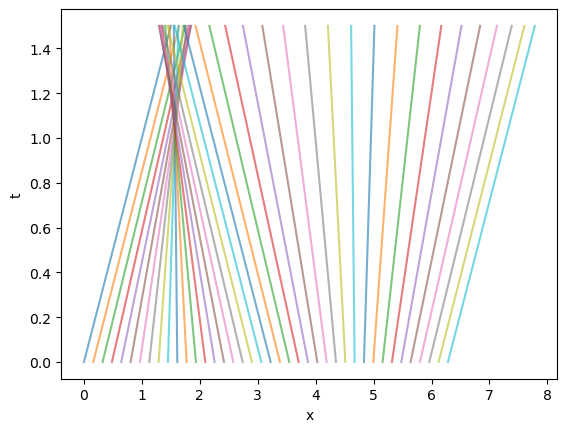

In [9]:
fig, axes = HJ_show_line(
    p0=lambda x: np.cos(x),
    dH=lambda p: p,
    x=np.linspace(0, 2 * np.pi, 40),
    tend=1.5,
)
save_to(fig, "HJ-2-line.png")

True
True
True


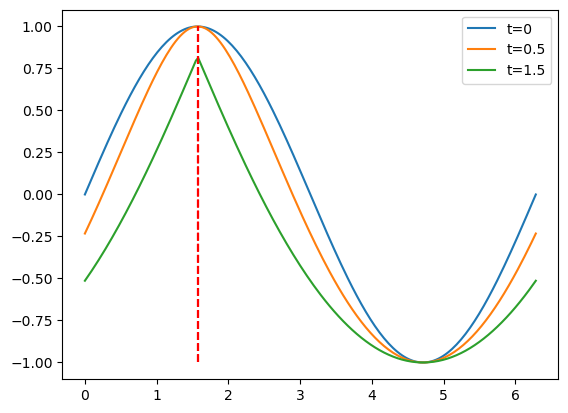

In [10]:
def init(x, t):
    k = 1 / (np.pi / 2 + t)
    u = np.where(x < np.pi / 2, k * (x + np.pi / 2), k * (x - 1.5 * np.pi))
    xi = x - u * t
    return xi


x = np.linspace(0, 2 * np.pi, 200)

f, df, post = HJ_characteristic_equation(
    H=lambda p: p**2 / 2,
    dH=lambda p: p,
    ddH=lambda p: np.ones_like(p),
    u0=lambda x: np.sin(x),
    du0=lambda x: np.cos(x),
    ddu0=lambda x: -np.sin(x),
)

fig, ax = plt.subplots()
for t in [0, 0.5, 1.5]:

    tmp = root(
        lambda z: f(x, t)(z),
        jac=lambda z: np.diag(df(x, t)(z)),
        x0=init(x, t),
    )
    print(tmp.success)

    u = post(tmp.x, t)

    ax.plot(x, u, label=f"{t=}")
    ax.legend()

    xstar = np.pi / 2
    ax.plot(xstar * np.ones(10), np.linspace(-1, 1, 10), "r--")


save_to(fig, "HJ-2.png")

### HJ-3

$H(p) = \frac12 p^2$.

$x \in [0,2\pi]$, $\phi_0(x) = \begin{cases}
            \pi - x, & x \in (0,\pi) \\
            x - \pi, & x \in (\pi,2\pi) \\
        \end{cases}$

In [11]:
def u0_j(x):
    x = np.mod(x, 2 * np.pi)
    return np.where(x <= np.pi, np.pi - x, x - np.pi)


def du0_j(x):
    x = np.mod(x, 2 * np.pi)
    return np.where(x <= np.pi, -1, 1)


def ddu0_j(x):
    return np.zeros_like(x)

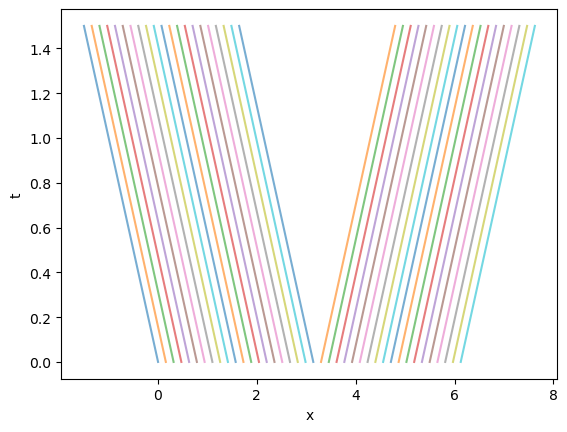

In [12]:
fig, axes = HJ_show_line(
    p0=du0_j,
    dH=lambda p: p,
    x=np.linspace(0, 2 * np.pi, 40,endpoint=False),
    tend=1.5,
)
save_to(fig, "HJ-3-line.png")

False
False
False


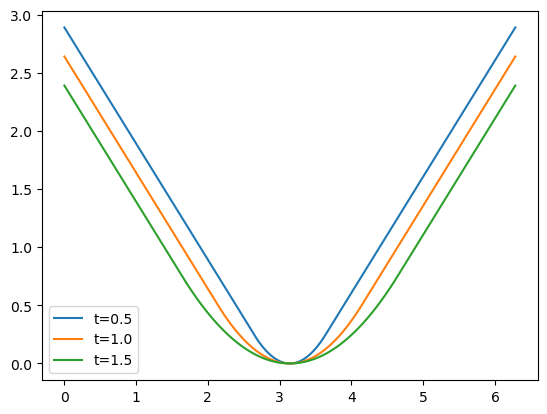

In [13]:
def init(x, t):
    return np.where(x > np.pi, x - t, x + t)


x = np.linspace(0, 2 * np.pi, 200)

f, df, post = HJ_characteristic_equation(
    H=lambda p: p**2 / 2,
    dH=lambda p: p,
    ddH=lambda p: np.ones_like(p),
    u0=u0_j,
    du0=du0_j,
    ddu0=ddu0_j,
)

fig, ax = plt.subplots()
for t in [0.5, 1.0, 1.5]:

    tmp = root(
        lambda z: f(x, t)(z),
        jac=lambda z: np.diag(df(x, t)(z)),
        x0=init(x, t),
    )
    print(tmp.success)

    u = post(tmp.x, t)
    u = np.where((x > np.pi - t) & (x < np.pi + t), (x - np.pi) ** 2 / (2 * t), u)

    ax.plot(x, u, label=f"{t=}")
    ax.legend()

save_to(fig, "HJ-3.png")

### HJ-4

$H(p) = \frac12 (p+\alpha)^2$. $\alpha=1$

$x \in [-1,1]$, $\phi_0(x) = -\cos(\pi x)$

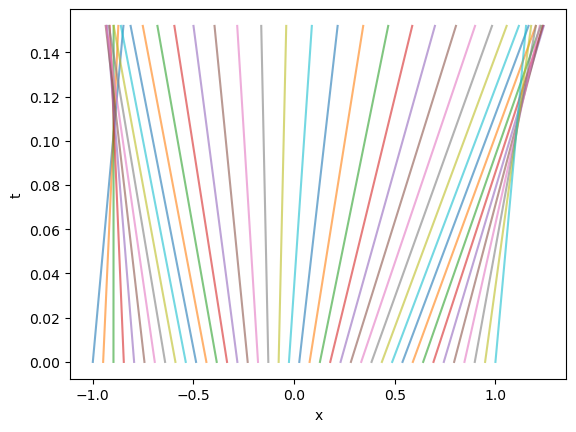

In [14]:
fig, axes = HJ_show_line(
    p0=lambda x: np.pi * np.sin(np.pi * x),
    dH=lambda p: p + 1,
    x=np.linspace(-1, 1, 40),
    tend=1.5/np.pi**2,
)
save_to(fig, "HJ-4-line.png")

True
True
True


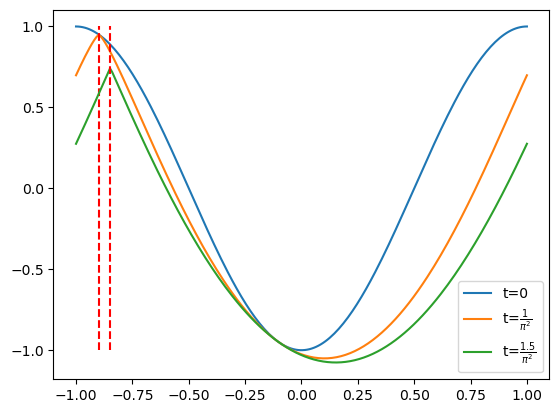

In [15]:
def init(x, t):
    x = np.asarray(x)
    base = 0
    delta = 2
    k = np.round((x - t - base) / delta)
    nearest = base + k * delta
    return nearest


x = np.linspace(-1, 1, 200)

f, df, post = HJ_characteristic_equation(
    H=lambda p: (p + 1) ** 2 / 2,
    dH=lambda p: p + 1,
    ddH=lambda p: np.ones_like(p),
    u0=lambda x: -np.cos(np.pi * x),
    du0=lambda x: np.pi * np.sin(np.pi * x),
    ddu0=lambda x: np.pi**2 * np.cos(np.pi * x),
)

fig, ax = plt.subplots()
for t, tname in zip(
    [0, 1.0 / np.pi**2, 1.5 / np.pi**2],
    ["0", "$\\frac{1}{\\pi^2}$", "$\\frac{1.5}{\\pi^2}$"],
):

    tmp = root(
        lambda z: f(x, t)(z),
        jac=lambda z: np.diag(df(x, t)(z)),
        x0=init(x, t),
    )
    print(tmp.success)

    u = post(tmp.x, t)

    ax.plot(x, u, label=f"t={tname}")
    ax.legend()

    if t >= 1.0 / np.pi**2:
        xstar = 1 + t - 2
        ax.plot(xstar * np.ones(10), np.linspace(-1, 1, 10), "r--")

save_to(fig, "HJ-4.png")

### HJ-5

$H(p) = -\cos(p+\alpha)$. $\alpha=1$

$x \in [-1,1]$, $\phi_0(x) = -\cos(\pi x)$

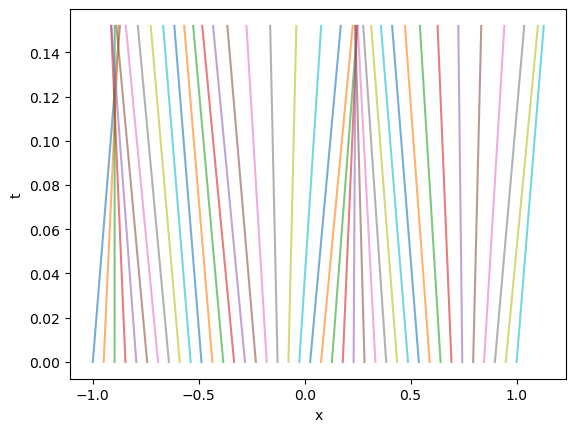

In [16]:
fig, axes = HJ_show_line(
    p0=lambda x: np.pi * np.sin(np.pi * x),
    dH=lambda p: np.sin(p + 1),
    x=np.linspace(-1, 1, 40),
    tend=1.5 / np.pi**2,
)
save_to(fig, "HJ-5-line.png")

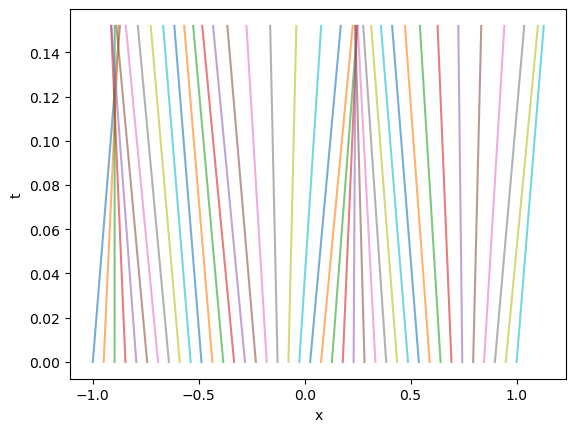

In [17]:
fig, axes = CV_show_line(
    u0=lambda x: np.sin(1 + np.pi * np.sin(np.pi * x)),
    df=lambda p: p,
    x=np.linspace(-1, 1, 40),
    tend=1.5 / np.pi**2,
)

True
False


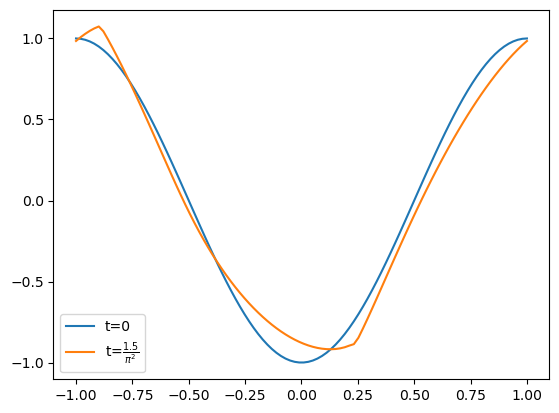

In [18]:
x = np.linspace(-1, 1, 100)

f, df, post = HJ_characteristic_equation(
    H=lambda p: -np.cos(p + 1),
    dH=lambda p: np.sin(p + 1),
    ddH=lambda p: np.cos(p + 1),
    u0=lambda x: -np.cos(np.pi * x),
    du0=lambda x: np.pi * np.sin(np.pi * x),
    ddu0=lambda x: np.pi**2 * np.cos(np.pi * x),
)


def scan_init(x, t):
    x = np.asarray(x)
    xstar = 0
    x_mod = np.mod(x - xstar, 2) + xstar
    xvec = np.linspace(xstar, xstar + 2, 500)
    uvec = np.sin(1 + np.pi * np.sin(np.pi * xvec))

    xtrace = xvec[:, None] + uvec[:, None] * t
    dist = np.abs(xtrace - x_mod)
    idx = np.argmin(dist, axis=0)
    return uvec[idx]


fig, ax = plt.subplots()
for t, tname in zip(
    [0, 1.5 / np.pi**2],
    ["0", "$\\frac{1.5}{\\pi^2}$"],
):

    tmp = root(
        lambda z: f(x, t)(z),
        # jac=lambda z: np.diag(df(x, t)(z)),
        x0=scan_init(x, t),
        method="broyden1",
    )
    print(tmp.success)

    u = post(tmp.x, t)

    ax.plot(x, u, label=f"t={tname}")
    ax.legend()

save_to(fig, "HJ-5.png")